# Machine Learning

## Import Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Let's Handle Missing Values in a Titanic Dataset.

In [21]:
# Let's Load Dataset
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Let's have bird eyeview on our dataset.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [9]:
# See the name of coloumns in our dataaset
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [10]:
# Let's check is there any missing value in our dataset.
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

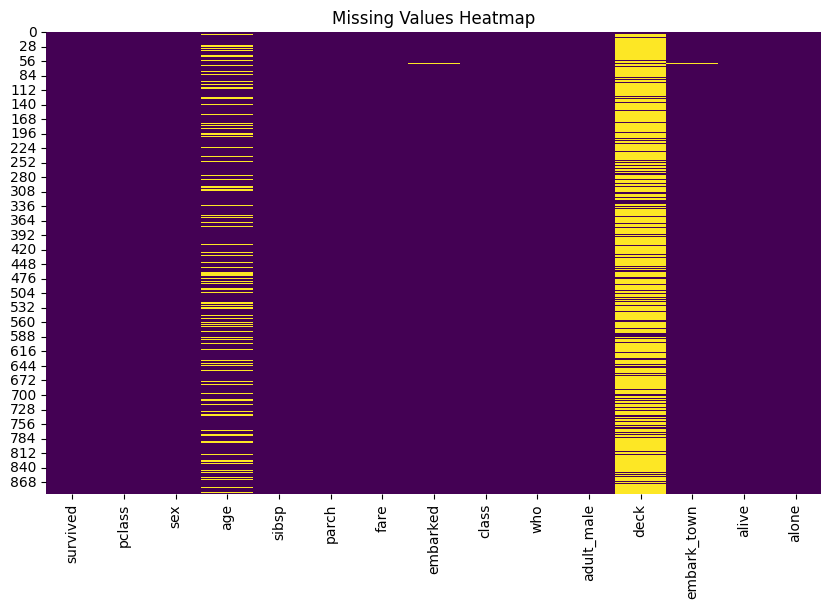

In [13]:
# Let's visualize the missing values in our dataset using heatmap.
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap') 
plt.show()


- There are four columns that contain missing values in our dataset namely `age`, `deck`, `embarked` and `embark_town`

In [14]:
# Let's check the percentage of missing values in our dataset.
df.isnull().sum() / len(df) * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

## Coloumns more than 70 percent going to be dropped mostly according to its importance.


In [22]:
# Dropping the deck column from the dataset.
df = df.drop('deck', axis=1)



In [28]:
round((df.isnull().sum() / len(df) * 100),2).sort_values(ascending=False)

age            19.87
embarked        0.22
embark_town     0.22
sex             0.00
pclass          0.00
survived        0.00
parch           0.00
sibsp           0.00
class           0.00
fare            0.00
who             0.00
adult_male      0.00
alive           0.00
alone           0.00
dtype: float64

## Let's Impute the missing values in age column 

In [31]:
# Let's impute the missing values age column with the median of the age column.
df['age'] = df['age'].fillna(df['age'].median())
# let's impute the missing values embarked column with the mode of the embarked column.
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
# Let's impute the missing values embark_town column with the mode of the embark_town column.
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

In [32]:
# Let;'s check again the percentage of missing values in our dataset.
round((df.isnull().sum() / len(df) * 100),2).sort_values(ascending=False)


survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64

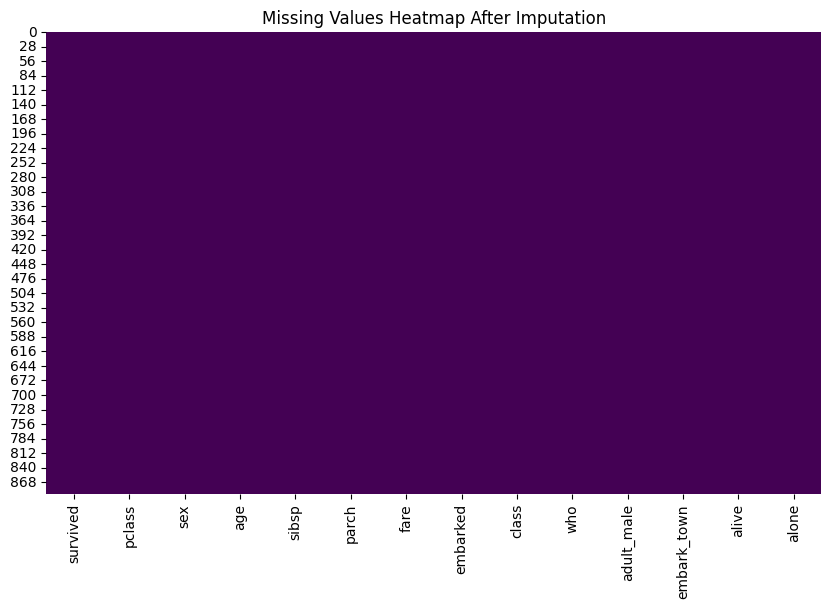

In [33]:
# Let's check the missing values again usinf heatmap.
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap After Imputation')
plt.show()


## We can also utiltize the power of Sk Learn Library for imputation

In [2]:
# Importing Libraries
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer


In [52]:
# Load Titanic Dataset
df = sns.load_dataset("Titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [53]:
# Let's check the missing values in our dataset.
df.isnull().sum().sort_values(ascending=False)


deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

In [54]:
# let's calculate the percentage of missing values in our dataset.
round(df.isnull().sum() / len(df) * 100,2).sort_values(ascending=False)

deck           77.22
age            19.87
embarked        0.22
embark_town     0.22
sex             0.00
pclass          0.00
survived        0.00
fare            0.00
parch           0.00
sibsp           0.00
class           0.00
adult_male      0.00
who             0.00
alive           0.00
alone           0.00
dtype: float64

In [55]:
# Drop the column the have more than 70% missing values.
df = df.drop("deck",axis=1)

In [56]:
# Let's again  calculate the percentage of missing values in our dataset.
round(df.isnull().sum() / len(df) * 100,2).sort_values(ascending=False)

age            19.87
embarked        0.22
embark_town     0.22
sex             0.00
pclass          0.00
survived        0.00
parch           0.00
sibsp           0.00
class           0.00
fare            0.00
who             0.00
adult_male      0.00
alive           0.00
alone           0.00
dtype: float64

In [66]:
# Impute the missing values in the age column with the median of the age column using SimpleImputer from sklearn.
Imputer = SimpleImputer(strategy="median")
df["age"] = Imputer.fit_transform(df[["age"]]).ravel()
# Impute the missing values in the embarked column with the mode of the embarked column using SimpleImputer from sklearn.
Imputer = SimpleImputer(strategy="most_frequent")
df["embarked"] = Imputer.fit_transform(df[["embarked"]]).ravel()
# Impute the missing values in the embark_town column with the mode of the embark_town column using SimpleImputer from sklearn.
Imputer = SimpleImputer(strategy="most_frequent")
df["embark_town"] = Imputer.fit_transform(df[["embark_town"]]).ravel()

In [67]:
# Let's Again calculate the percentage of missing values in our dataset.
round(df.isnull().sum() / len(df) * 100,2).sort_values(ascending=False)

survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64

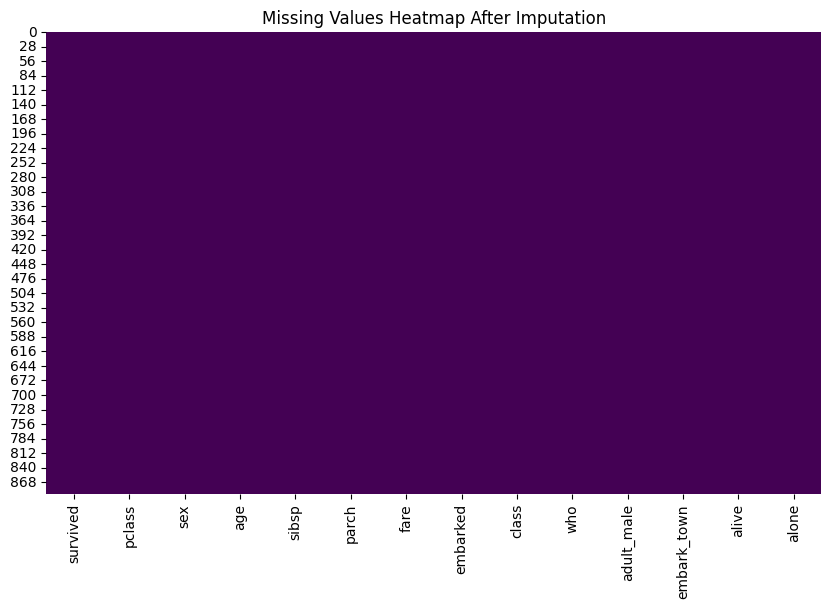

In [68]:
# Let's check the missing values again usinf heatmap.
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap After Imputation')
plt.show()


# Multivariate Imputation

In [1]:
# Importing Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
# Load Titanic Dataset
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

In [4]:
df.drop("deck", axis=1, inplace=True)
# Let's check the percentage of missing values in our dataset.
round(df.isnull().sum() / len(df) * 100, 2).sort_values(ascending=False)

age            19.87
embarked        0.22
embark_town     0.22
sex             0.00
pclass          0.00
survived        0.00
parch           0.00
sibsp           0.00
class           0.00
fare            0.00
who             0.00
adult_male      0.00
alive           0.00
alone           0.00
dtype: float64

In [9]:
# Impute missing values of age column using IterativeImputer from sklearn.
Imputer = IterativeImputer(max_iter=20, n_nearest_features=5)
df["age"] = Imputer.fit_transform(df[["age"]]).ravel()
# Lets again check the percentage of missing values in our dataset.
round(df.isnull().sum() / len(df) * 100, 2).sort_values(ascending=False)

embark_town    0.22
embarked       0.22
sex            0.00
age            0.00
survived       0.00
pclass         0.00
parch          0.00
sibsp          0.00
class          0.00
fare           0.00
who            0.00
adult_male     0.00
alive          0.00
alone          0.00
dtype: float64

# Ffill and Bfill

In [11]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [12]:
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

In [14]:
round(df.isnull().sum() / len(df) * 100,2).sort_values(ascending=False)

deck           77.22
age            19.87
embarked        0.22
embark_town     0.22
sex             0.00
pclass          0.00
survived        0.00
fare            0.00
parch           0.00
sibsp           0.00
class           0.00
adult_male      0.00
who             0.00
alive           0.00
alone           0.00
dtype: float64

In [15]:
df.drop("deck", axis=1, inplace=True)

In [16]:
round(df.isnull().sum() / len(df) * 100,2).sort_values(ascending=False)

age            19.87
embarked        0.22
embark_town     0.22
sex             0.00
pclass          0.00
survived        0.00
parch           0.00
sibsp           0.00
class           0.00
fare            0.00
who             0.00
adult_male      0.00
alive           0.00
alone           0.00
dtype: float64

In [21]:
# Impute missing values using Forward Fill Method
df["age"] = df["age"].ffill()
df["embarked"] = df["embarked"].ffill()
df["embark_town"] = df["embark_town"].ffill()
# Let's check the percentage of missing values in our dataset.
round(df.isnull().sum() / len(df) * 100,2).sort_values(ascending=False)



survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64

In [23]:
print(df["age"].mean())
print(df["embark_town"].mode()[0])
print(df["embarked"].mode()[0])

29.581560044893376
Southampton
S


In [25]:
df = sns.load_dataset("titanic")
df.drop("deck", axis=1, inplace=True)
# Impute missing values using Backward Fill Method
df["age"] = df["age"].bfill()
df["embarked"] = df["embarked"].bfill()
df["embark_town"] = df["embark_town"].bfill()
# Let's check the percentage of missing values in our dataset.
round(df.isnull().sum() / len(df) * 100,2).sort_values(ascending=False)




survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64

In [26]:
print(df["age"].mean())
print(df["embark_town"].mode()[0])
print(df["embarked"].mode()[0])

29.87056116722783
Southampton
S


# KNN Imputer

In [28]:
from sklearn.impute import KNNImputer
Imputer = KNNImputer(n_neighbors=5)
# Load Titanic Dataset
df = sns.load_dataset("titanic")
df.head()
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

In [29]:
df.drop("deck", axis=1, inplace=True)
# Let's check the percentage of missing values in our dataset.
round(df.isnull().sum() / len(df) * 100, 2).sort_values(ascending=False)

age            19.87
embarked        0.22
embark_town     0.22
sex             0.00
pclass          0.00
survived        0.00
parch           0.00
sibsp           0.00
class           0.00
fare            0.00
who             0.00
adult_male      0.00
alive           0.00
alone           0.00
dtype: float64

In [32]:
# Let's fill the missing values of age  using KNNImputer from sklearn.
df["age"] = Imputer.fit_transform(df[["age"]]).ravel()
# Let's check the percentage of missing values in our dataset.
round(df.isnull().sum() / len(df) * 100, 2).sort_values(ascending=False)



embark_town    0.22
embarked       0.22
sex            0.00
age            0.00
survived       0.00
pclass         0.00
parch          0.00
sibsp          0.00
class          0.00
fare           0.00
who            0.00
adult_male     0.00
alive          0.00
alone          0.00
dtype: float64

In [33]:
df["age"].mean()

np.float64(29.69911764705882)